# <span style="color:red"> Lezione 4</span>

## <span style="color:green"> Esercizio 4.1</span>

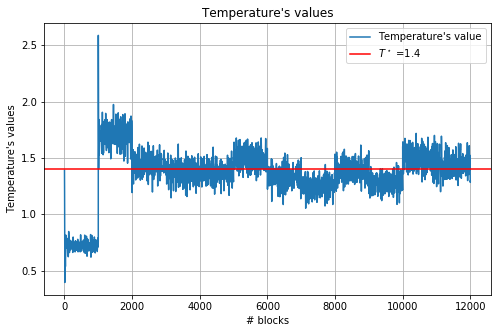

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.gridspec as gridspec

fig = plt.figure()
fig.set_size_inches(8,5)

x = np.loadtxt("/home/piet/Scrivania/MolecularDynamics_NVE/output_temp.dat")

plt.plot(x, label='Temperature\'s value')
plt.axhline(y=1.4, color='r', linestyle='-', label=f'$T^\star$ =1.4')
plt.xlabel('# blocks')
plt.ylabel('Temperature\'s values')
plt.title('Temperature\'s values')
plt.grid(True)
plt.legend()
plt.show()

Possiamo vedere come il training porti il nostro algoritmo ad equilibrarsi (abbiamo preso come esempio la temperatura e sono state fatte 1000 misure per ogni simulazione). Vediamo che le prime due simulazioni sono molto distanti dal valore desiderato $T^\star=1.4$ (dato estratto dal file <font face="Courier">input.solid</font>). Con i successivi restart possiamo vedere che le misure di $T$ oscillino attorno a $T^\star$ e possiamo quindi assumere che il nostro algoritmo sia andato ad equilibrarsi.

## <span style="color:green"> Esercizio 4.2</span>

In questo esercizio riprendiamo il codice del 4.1, ma implementiamo la possibilità si salvare le quantità
termodinamiche medie e le relative incertezze. Per farlo partendo dal codice già scritto, possiamo, dopo aver equilibrato il codice, usando il file <font face="Courier">input.solid</font> ($10^4$ mosse)(dal 4.1 si vede che bastano 3/4 restart) pulire i file (usando <font face="Courier">./clean.sh</font>) e fare restart con input forniti dal file <font face="Courier">input.mis_solid</font> ($10^5$ mosse). Implementiamo il fatto che il programma dopo al svolto le misure ${\frac{10^5}{10}}$ sulle grandezze termodinamiche (il fattore /10 è douvto al fatto che ogni dieci "mosse" viene effetuata la misura), legga dai file di "output_....dat" i valori.Tramite poi la classe <font face="Courier">Experiment</font> elaboriamo questi dati estraendone medie e incertezze (ad esempio $<E/N>$ con $\sigma(E/N)$).

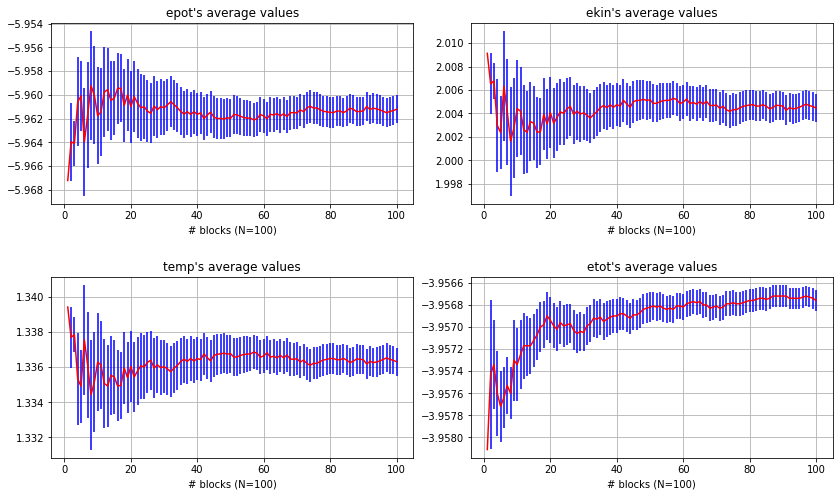

In [53]:
# Definisco i vari vettori da utilizzare nel for
type = ['epot','ekin','temp','etot']
h=0
nmis=10000
block=100
x = np.arange(1,100+1) 
# Definisco le dimensioni del grafico
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,8),gridspec_kw=dict(wspace=0.16, hspace=0.4))
# Il "for" per creare i tre grafici più il fitting sull'ultimo vettore v100
for i in range(2):
    for j in range (2):
        sum_prog, err_prog = np.loadtxt(f"/home/piet/Esercizi/lezione4/4.2/ave_"+type[h]+".dat",\
                        usecols=(0,1), delimiter=' ', unpack='true')
        ax[i,j].errorbar(x,sum_prog,yerr=err_prog, color='red', ecolor='blue')
        ax[i,j].set_xlabel(f'# blocks (N={block})')
        ax[i,j].set_xlabel(f'# blocks (N={block})')
        ax[i,j].set_title(type[h]+'\'s average values')
        ax[i,j].grid(True)
        h+=1
plt.show()

COMMMMMEMEMEEENTOOOOOOOOOOOOOOOOO

## <span style="color:green"> Esercizio 4.3</span>

Ora per implementare l'utilizzo dei file di input, quando andremo a far partire l'eseguibile dovremo scrivere: \
<font face="Courier">./MolDyn_NVE.exe A tipo_di_stato</font> \
dove A sarà <font face="Courier">0/1</font> per Start/Restart e tipo_di stato sarà <font face="Courier">solid/liquid/gas</font>. Il programma fornirà così, a seconda dello stato fisico in cui sarà impostato,4 file contenenti le medie ed incertezze di $E/N$, $U/N$, $K/N$. Per equilibrate usare i file <font face="Courier">input.solid/liquid/gas</font> ($10^4$ mosse), per la misura <font face="Courier">input.mis_solid/liquid/gas</font> ($10^5$ mosse). Per i procedimento usare quello riportato nell'esercizio 4.2.

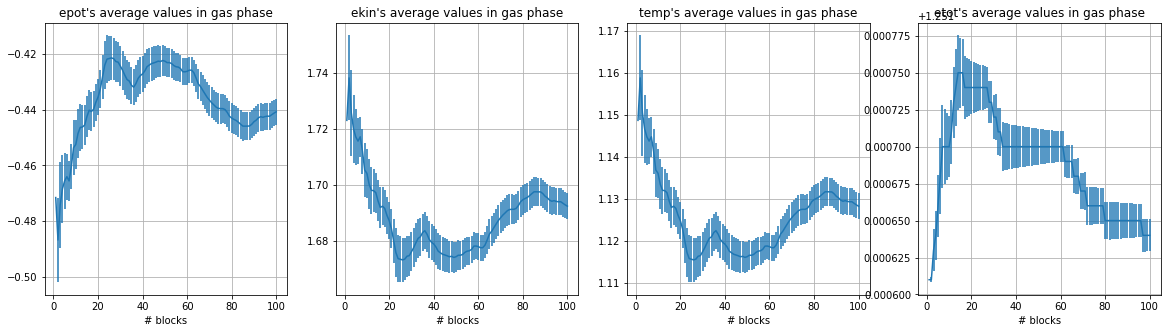

In [55]:
# Definisco i vari vettori da utilizzare nel for
type = ['epot','ekin','temp','etot']
state = ['gas','liquid','solid']
sub_plot = [141,142,143,144]
nmis=10000
x = np.arange(1,101) 
# Definisco le dimensioni del grafico
plt.figure(figsize=(20, 5))
# Il "for" per creare i tre grafici più il fitting sull'ultimo vettore v100
for j in range(1):
    for i in range(4):
        plt.subplot(+sub_plot[i])
        sum_prog, err_prog = np.loadtxt(f"/home/piet/Esercizi/lezione4/4.3/ave_"+type[i]+"_"+state[j]+".dat",\
                        usecols=(0,1), delimiter=' ', unpack='true')
        plt.errorbar(x,sum_prog,yerr=err_prog)
        plt.xlabel('# blocks')
        plt.title(type[i]+'\'s average values in '+state[j]+' phase')
        plt.grid(True)
plt.show()

<span style="color:red"> Ho fatto solo due simulazioni per il gas. Devo fare le altre fino a 4/5 sim. Poi rifare il tutto anche per liquid e solid </span>